<a href="https://colab.research.google.com/github/yashyakumar/Hotel_Booking_Analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
file_path='/content/drive/MyDrive/Copy of Hotel Bookings.csv'
df=pd.read_csv(file_path)

In [86]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Lets understand the data
###hotel-Type of hotel
###is_canceled-The customer canceled the booking or not
###lead_time-days between booking and arrival
###arrival_date_year - year the customer arrives
###arrival_date_month-month of arrival
###arrival_date_day_of_month-arrival date in a the month







In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [88]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

#Data Cleaning

In [89]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [90]:
df.isnull().sum()/len(df.index)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [91]:
df.drop(['company','agent'],inplace=True,axis=1) #dropping columns which have most no of null values

In [92]:
df.dropna(axis=0,inplace=True)

In [93]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

([<matplotlib.patches.Wedge at 0x7f3df5c557d0>,
 [Text(-0.9953716224972733, -0.5759646978132826, 'City Hotel'),
  Text(0.9520945438510592, 0.5509228435716237, 'Resort Hotel')],
 [Text(-0.5626013518462848, -0.3255452639814206, '66.7%'),
  Text(0.5193242966460322, 0.3005033692208856, '33.3%')])

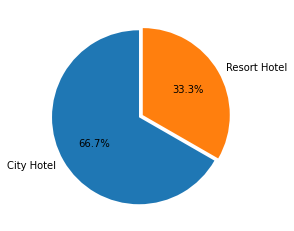

In [94]:
labels=df['hotel'].value_counts().index.to_list()
sizes=df['hotel'].value_counts().to_list()
plt.pie(sizes,labels=labels,autopct='%1.1f%%',explode=(0.05,0),startangle=90)

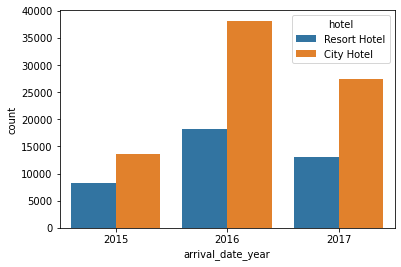

In [95]:
sns.countplot(x='arrival_date_year', data=df,hue='hotel')

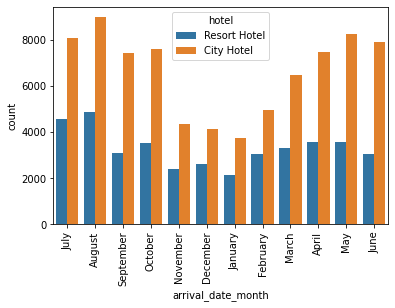

<Figure size 1080x720 with 0 Axes>

In [96]:
plt.xticks(rotation=90)
sns.countplot(x='arrival_date_month',data=df,hue='hotel')
# plt.xtickables()
fig=plt.figure(figsize=(15,10))


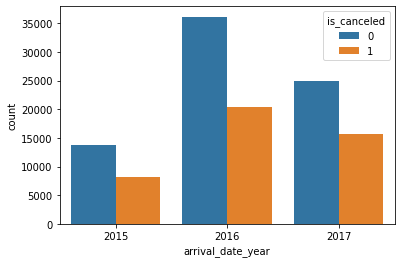

In [97]:
sns.countplot(x='arrival_date_year',data=df,hue='is_canceled')

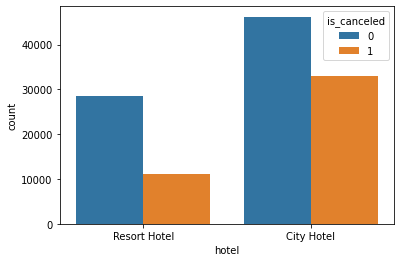

In [98]:
sns.countplot(x='hotel',data=df,hue='is_canceled')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

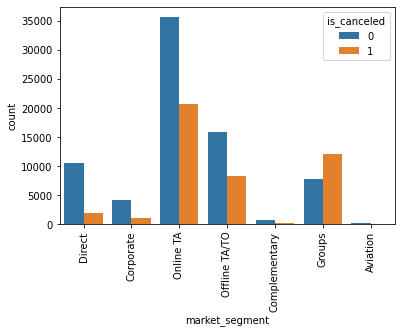

In [99]:
sns.countplot(x='market_segment',data=df,hue='is_canceled')
plt.xticks(rotation=90)

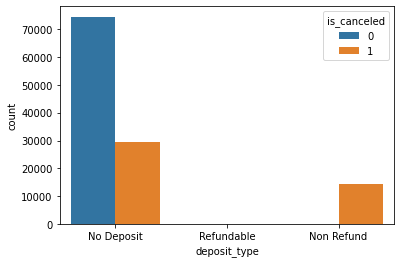

In [100]:
sns.countplot(x='deposit_type',data=df,hue='is_canceled')

In [101]:
canceled=df.loc[df['is_canceled']==1]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

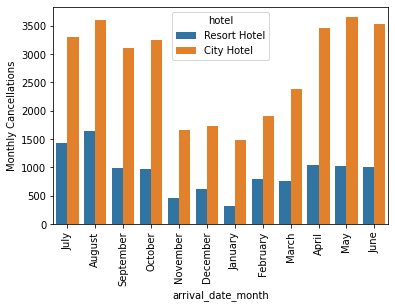

In [102]:
sns.countplot(x='arrival_date_month',data=canceled,hue='hotel')
plt.ylabel('Monthly Cancellations')
plt.xticks(rotation=90)

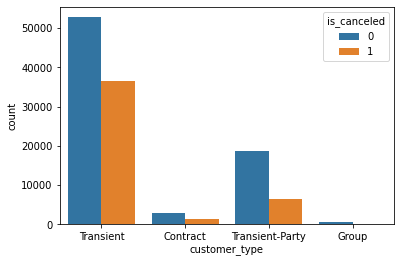

In [103]:
sns.countplot(x='customer_type',data=df,hue='is_canceled')

In [104]:
country=df.groupby('country')[['hotel','is_canceled']].count().reset_index()
country.sort_values('is_canceled',ascending=False,inplace=True)
country=country.head(10)
country

,country,hotel,is_canceled
135,PRT,48586,48586
59,GBR,12129,12129
56,FRA,10415,10415
51,ESP,8568,8568
43,DEU,7287,7287
81,ITA,3766,3766
76,IRL,3375,3375
15,BEL,2342,2342
25,BRA,2224,2224
123,NLD,2104,2104


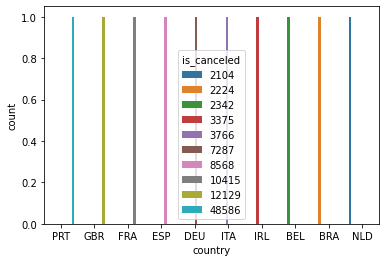

In [105]:
sns.countplot(x='country',data=country,hue='is_canceled')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

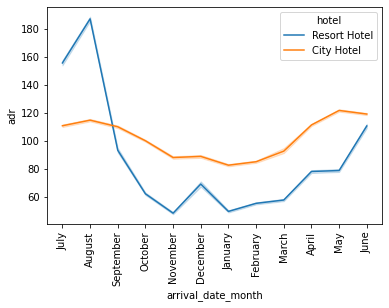

In [107]:
sns.lineplot(x='arrival_date_month',y='adr',hue='hotel',data=df)
plt.xticks(rotation=90)

In [108]:
meals=df['meal'].value_counts().index.to_list()
sizes=df['meal'].value_counts().to_list()

([<matplotlib.patches.Wedge at 0x7f3df567ef90>,
 [Text(-0.8310821778146824, 0.7206264037063899, 'BB'),
  Text(0.5499159274698551, -0.9526764785145948, 'HB'),
  Text(1.0195531452924926, -0.4129302409901526, 'SC'),
  Text(1.0970741248270728, -0.08017708297831867, 'Undefined'),
  Text(1.0997554819778173, -0.023192237057667698, 'FB')],
 [Text(-0.6044234020470417, 0.5240919299682835, '77.3%'),
  Text(0.3999388563417128, -0.6928556207378871, '12.1%'),
  Text(0.7414931965763583, -0.3003129025382928, '8.9%'),
  Text(0.7978720907833257, -0.058310605802413575, '1.0%'),
  Text(0.7998221687111399, -0.016867081496485598, '0.7%')])

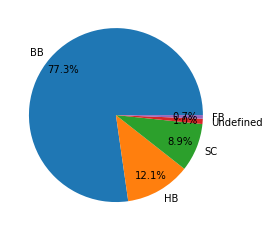

In [109]:
explode=(0,0,0,0.5,0.5)

plt.pie(sizes,labels=meals,autopct='%1.1f%%',pctdistance=0.8)